# Group 10 - Project 1

# Members: Bryan Groves, Randy Lam, Zach Wood, Marti Reisinger

# Topic: Drivers in revenue for top 1000 movies

## Overview: We intend to utilize a dataset from Kaggle that outlines the top 1000 movies by their ranking. We intend to analyze the studio, runtime, and performance by date  from both revenue and number of movies that fall within these categories.

In [2]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import datetime

#### Is there a better time of year for movie successes? We would like to look at the top 1000 movies and understand if summer blockbusters (June-Aug) fair better than holiday movies (Nov-Jan)

In [11]:
#importing new csv file
shortlist_df = pd.read_csv("Resources/Movies 3.csv")
pd.set_option('display.max_rows', None)
print(shortlist_df)

     Ranking                                              Title Release Date  \
0          0  Star Wars: Episode VII - The Force Awakens (2015)   12/16/2015   
1          2                                      Avatar (2009)   12/16/2009   
2          6                                     Titanic (1997)   12/19/1997   
3          7                              Jurassic World (2015)    6/10/2015   
4          9     Star Wars: Episode VIII - The Last Jedi (2017)   12/13/2017   
5         11                               The Lion King (2019)    7/11/2019   
6         12                             The Dark Knight (2008)    7/16/2008   
7         13                Rogue One: A Star Wars Story (2016)   12/14/2016   
8         14  Star Wars: Episode IX - The Rise of Skywalker ...   12/18/2019   
9         17                                   Frozen II (2019)   11/20/2019   
10        21                       The Dark Knight Rises (2012)    7/19/2012   
11        23                  E.T. the E

In [12]:
shortlist_df['Release Date']=pd.to_datetime(shortlist_df['Release Date']).dt.month
print(shortlist_df)

     Ranking                                              Title  Release Date  \
0          0  Star Wars: Episode VII - The Force Awakens (2015)            12   
1          2                                      Avatar (2009)            12   
2          6                                     Titanic (1997)            12   
3          7                              Jurassic World (2015)             6   
4          9     Star Wars: Episode VIII - The Last Jedi (2017)            12   
5         11                               The Lion King (2019)             7   
6         12                             The Dark Knight (2008)             7   
7         13                Rogue One: A Star Wars Story (2016)            12   
8         14  Star Wars: Episode IX - The Rise of Skywalker ...            12   
9         17                                   Frozen II (2019)            11   
10        21                       The Dark Knight Rises (2012)             7   
11        23                

In [13]:
grouped=shortlist_df.groupby(['Release Date'], as_index=False).sum()
grouped.dtypes

Release Date    int64
Ranking         int64
World Sales     int64
dtype: object

In [18]:
grouped.set_index('Release Date').groupby("Release Date").sum()

,Ranking,World Sales
Release Date,,
1,10784,5287296730
6,49462,53318848335
7,44258,40063199122
8,27942,12804437681
11,38236,34871622684
12,53960,44607288309


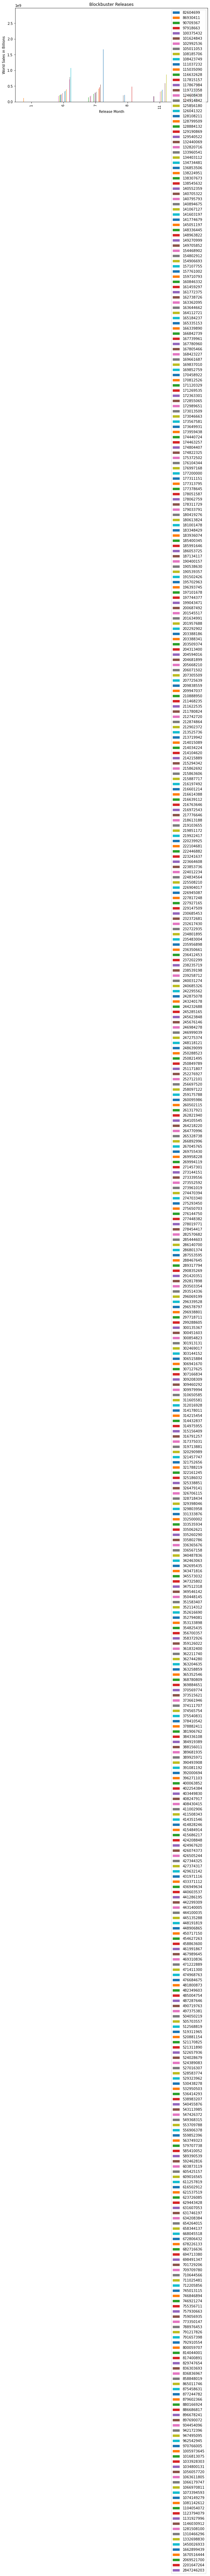

In [19]:
plt.rcParams["figure.figsize"] = (10,5)
shortlist_df.drop(columns=["Ranking"])
shortlist_df.pivot(index='Release Date', columns='World Sales', values='World Sales').plot(kind='bar')

plt.xlabel('Release Month')
plt.ylabel('World Sales in Billions')
plt.title('Blockbuster Releases')
plt.legend(loc='upper right')
plt.show()


In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
shortlist_df.plot.bar(x="Release Date", y="World Sales", rot=90)

In [ ]:
plt.rcParams["figure.figsize"] = [12,8]
grouped1 = pd.DataFrame({"Jan":[199, 811, 623, 732, 754],
                         "Nov":[420, 843, 409, 97, 26],
                         "Dec":[13, 712, 6, 781, 0]})
ax= grouped1.plot.bar('World Sales')
plt.show()

In [ ]:
grouped.plot.bar(x='Release Date',
                )

#### We would like to measure the total revenue by year for movies that are in the top 1000 list

In [ ]:
#Randy Visual 2

In [29]:
movieslist = pd.read_csv("Resources/Movies 3.csv")
pd.set_option('display.max_rows', None)
print(movieslist)

     Ranking                                              Title Release Date  \
0          0  Star Wars: Episode VII - The Force Awakens (2015)   12/16/2015   
1          2                                      Avatar (2009)   12/16/2009   
2          6                                     Titanic (1997)   12/19/1997   
3          7                              Jurassic World (2015)    6/10/2015   
4          9     Star Wars: Episode VIII - The Last Jedi (2017)   12/13/2017   
5         11                               The Lion King (2019)    7/11/2019   
6         12                             The Dark Knight (2008)    7/16/2008   
7         13                Rogue One: A Star Wars Story (2016)   12/14/2016   
8         14  Star Wars: Episode IX - The Rise of Skywalker ...   12/18/2019   
9         17                                   Frozen II (2019)   11/20/2019   
10        21                       The Dark Knight Rises (2012)    7/19/2012   
11        23                  E.T. the E

In [30]:
movieslist['Release Date']=pd.to_datetime(movieslist['Release Date']).dt.year
print(movieslist)

     Ranking                                              Title  Release Date  \
0          0  Star Wars: Episode VII - The Force Awakens (2015)          2015   
1          2                                      Avatar (2009)          2009   
2          6                                     Titanic (1997)          1997   
3          7                              Jurassic World (2015)          2015   
4          9     Star Wars: Episode VIII - The Last Jedi (2017)          2017   
5         11                               The Lion King (2019)          2019   
6         12                             The Dark Knight (2008)          2008   
7         13                Rogue One: A Star Wars Story (2016)          2016   
8         14  Star Wars: Episode IX - The Rise of Skywalker ...          2019   
9         17                                   Frozen II (2019)          2019   
10        21                       The Dark Knight Rises (2012)          2012   
11        23                

In [32]:
years=movieslist.groupby(['Release Date'], as_index=False).sum()
print(years)

    Release Date  Ranking  World Sales
0           1975      117    471411300
1           1978      679    696722706
2           1979      888     82604699
3           1981      758    498111677
4           1982      292    970110554
5           1983      621    108423749
6           1984      137    296578797
7           1985      193    381906762
8           1986      424    138545632
9           1987      306    167780960
10          1988     2101   1042846978
11          1989      675    744008345
12          1990     3071   2272642689
13          1991     3170   2094664133
14          1992     3308   1540537741
15          1993     2122   2202300076
16          1994     4486   3914134046
17          1995     1777    863607318
18          1996     3452   2440658199
19          1997     5997   5198243915
20          1998     7067   4003428309
21          1999     9068   5089584460
22          2000     9592   4747754438
23          2001    10067   6807180718
24          2002     8958

In [33]:
movieslist.set_index('Release Date').groupby("Release Date").sum()

,Ranking,World Sales
Release Date,,
1975,117,471411300
1978,679,696722706
1979,888,82604699
1981,758,498111677
1982,292,970110554
1983,621,108423749
1984,137,296578797
1985,193,381906762
1986,424,138545632


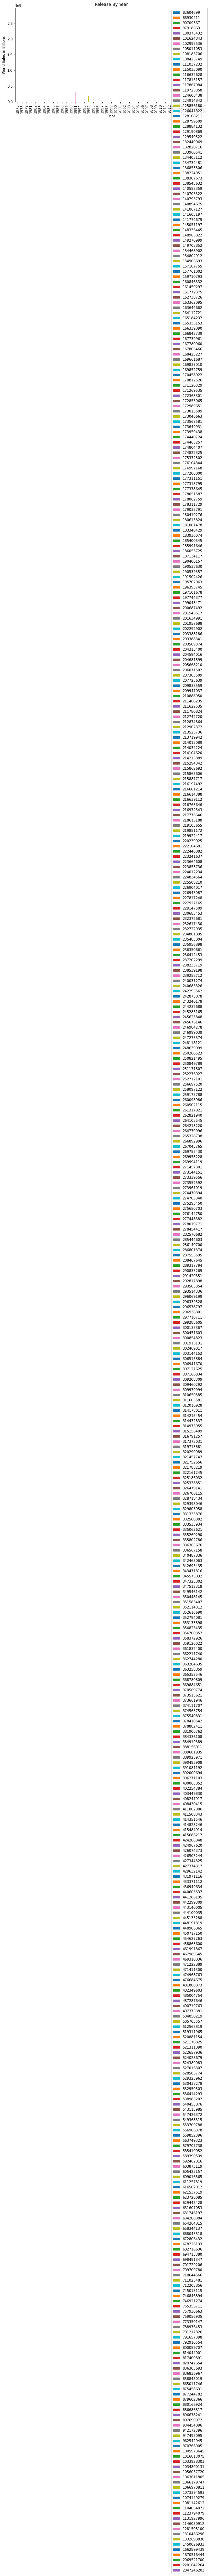

In [35]:
plt.rcParams["figure.figsize"] = (10,5)
movieslist.pivot(index='Release Date', columns='World Sales', values='World Sales').plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('World Sales in Billions')
plt.title('Release By Year')
plt.legend(loc='upper right')
plt.show()